In [ ]:
from sklearn import datasets

In [ ]:
ds = datasets.load_diabetes()

In [ ]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, train_size=0.5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, clf.predict(X_test))

8310.71040723982

In [ ]:
mean_squared_error(y_train, clf.predict(X_train))

0.0

In [ ]:
import numpy as np

In [ ]:
res = np.zeros(X_test.shape[0])

In [ ]:
N = 100

In [ ]:
clf = DecisionTreeRegressor()

In [ ]:
for i in range(N):
  ind = np.random.choice(np.arange(X_train.shape[0]), 
                         size = X_train.shape[0],
                         replace=True)
  clf.fit(X_train[ind], y_train[ind])
  res += clf.predict(X_test)

In [ ]:
mean_squared_error(y_test, res/N)

3388.0759022624434

In [ ]:
res = np.zeros(X_test.shape[0])

In [ ]:
N = 100

In [ ]:
clf = DecisionTreeRegressor()

In [ ]:
for i in range(N):
  ind = np.random.choice(np.arange(X_train.shape[0]),
                         size = X_train.shape[0],
                         replace=True)
  ind_feat = np.random.choice(np.arange(X_test.shape[1]),
                         size = int(0.2*X_test.shape[1]))
  clf.fit(X_train[ind][:, ind_feat], y_train[ind])
  res += clf.predict(X_test[:, ind_feat])

In [ ]:
mean_squared_error(y_test, res/N)

3823.047673602578

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf = RandomForestRegressor(n_estimators=100, max_features=0.2)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
mean_squared_error(y_test, clf.predict(X_test))

3126.0158873303167

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
Q = []

In [ ]:
for n_est in range(1, 200, 2):
  clf = RandomForestRegressor(n_estimators=n_est, max_features=0.2)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

Text(0, 0.5, 'MSE')

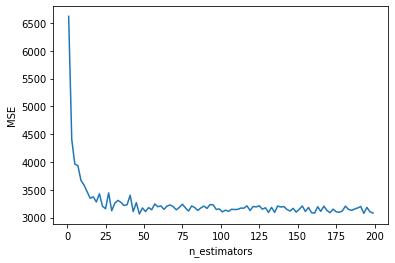

In [ ]:
plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [ ]:
Q = []

In [ ]:
for m_f in range(1, 11):
  clf = RandomForestRegressor(n_estimators=100, max_features=m_f)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

Text(0, 0.5, 'MSE')

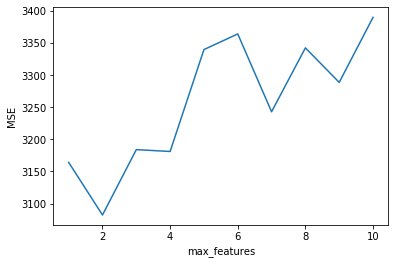

In [ ]:
plt.plot(range(1, 11), Q)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [ ]:
clf = RandomForestRegressor(n_estimators=200, max_features=0.2)
clf.fit(X_train, y_train)
mean_squared_error(y_test,  clf.predict(X_test))

3149.9767194570136

In [ ]:
clf.feature_importances_

array([0.05922369, 0.0185372 , 0.19276354, 0.09364263, 0.06645934,
       0.07693276, 0.1075834 , 0.0717267 , 0.2116689 , 0.10146183])

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
features_imp = pd.DataFrame({'importance': clf.feature_importances_,
                             'name': ds.feature_names})

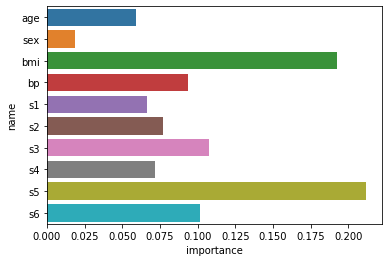

In [ ]:
sns.barplot(x='importance', y='name', data=features_imp)

In [ ]:
ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
ind = np.append(np.arange(2), np.arange(3, 10))
clf = RandomForestRegressor(n_estimators=200, max_features=0.2)
clf.fit(X_train[:, ind], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
mean_squared_error(y_test, clf.predict(X_test[:, ind]))

3660.645579638009

In [ ]:
ind = np.append(np.arange(1), np.arange(2, 10))
clf.fit(X_train[:, ind], y_train)
mean_squared_error(y_test, clf.predict(X_test[:, ind]))

3229.5869708144796

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mean_squared_error(y_test, lr.predict(X_test))

3237.8669523883786

In [ ]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
min_mse = mean_squared_error(y_test, lr.predict(X_test))
for i in range(100):
  mse = mean_squared_error(y_test, (i*lr.predict(X_test) +\
                                    (100 - i)*clf.predict(X_test))/100.0)
  if mse < min_mse:
    min_mse = mse
    best_i = i

In [ ]:
mean_squared_error(y_test, (best_i*lr.predict(X_test) + \
                            (100 - best_i)*clf.predict(X_test))/100.0)

3223.0970803046707